# Stochastic Gradient Descent 

In [39]:
import numpy as np 
import matplotlib.pyplot as plt

## Dataset

The function 

$$ z(x,y) = \exp (a(x-x_0)^2 + a(y-y_0)^2) + \exp (a(x-x_1)^2 + a(y-y_1)^2) - \exp (a(x-x_2)^2 + b(y-y_2)^2) $$

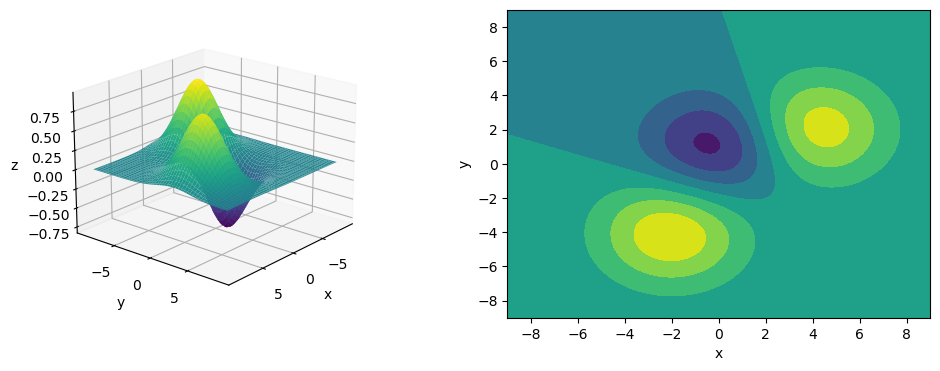

In [43]:
# import for colormaps
from matplotlib import cm

x=np.linspace(-9,9, num=100)
y=np.linspace(-9,9, num=100)

x, y = np.meshgrid(x, y)

a = -0.1
x_0 = 4
y_0 = 2
x_1 = -2 
y_1 = -4 
x_2 = 0
y_2 = 1

def z_function(x,y):
    z_0 = np.exp(a*(x-x_0)**2 + a*(y-y_0)**2)
    z_1 = np.exp(a*(x-x_1)**2 + a*(y-y_1)**2)
    z_2 = np.exp(a*(x-x_2)**2 + a*(y-y_2)**2)
    return z_0 + z_1 - z_2

z = z_function(x,y)

# Plotting
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.view_init(20, 40)
#ax1.plot_surface(x,y, z, cmap=cm.jet)
ax1.plot_surface(x,y, z, cmap='viridis')
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax2 = fig.add_subplot(122)
#ax2.contourf(x,y,z, cmap = cm.jet)
ax2.contourf(x,y,z, cmap = 'viridis')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.show()

## Algorithm

Gradient Descent 

$$ [x_n, y_n] = [x_{n-1}, y_{n-1}] + \lambda \cdot  \nabla z(x_{n-1},y_{n-1})$$

Where 

$$\frac{\partial z}{\partial x} = exp(\dots) \cdot 2a(x-x_0) + exp(\dots) \cdot 2a(x-x_1) - exp(\dots) \cdot 2a(x-x_2)$$ 
$$\frac{\partial z}{\partial y} = exp(\dots) \cdot 2a(y-y_0) + exp(\dots) \cdot 2a(y-y_1) - exp(\dots) \cdot 2a(y-y_2)$$ 

And $\nabla z(x,y) = [\frac{\partial z}{\partial x}, \frac{\partial z}{\partial y}]$

In [41]:
def gradient_descent(prev_x, prev_y, learning_rate):

    gradient_x_left = np.exp(a*(prev_x - x_0)**2 + a*(prev_y - y_0)**2) * 2*a*(prev_x - x_0)
    gradient_x_middle = np.exp(a*(prev_x - x_1)**2 + a*(prev_y - y_1)**2) * 2*a*(prev_x - x_1)
    gradient_x_right = np.exp(a*(prev_x - x_2)**2 + a*(prev_y - y_2)**2) * 2*a*(prev_x - x_2)

    gradient_x = gradient_x_left + gradient_x_middle - gradient_x_right

    gradient_y_left = np.exp(a*(prev_x - x_0)**2 + a*(prev_y - y_0)**2) * 2*a*(prev_y - y_0)
    gradient_y_middle = np.exp(a*(prev_x - x_1)**2 + a*(prev_y - y_1)**2) * 2*a*(prev_y - y_1)
    gradient_y_right = np.exp(a*(prev_x - x_2)**2 + a*(prev_y - y_2)**2) * 2*a*(prev_y - y_2)

    gradient_y = gradient_y_left + gradient_y_middle - gradient_y_right

    new_x = prev_x + learning_rate*gradient_x
    new_y = prev_y + learning_rate*gradient_y 

    return new_x, new_y 

def iterate_over_initial_conditions(initial_x, initial_y, steps = 10000, learning_rate = 0.5):

    next_x, next_y = initial_x, initial_y
    x_list = [next_x]
    y_list = [next_y]

    for _ in range(steps):
        next_x, next_y = gradient_descent(next_x, next_y, learning_rate = learning_rate)
        x_list.append(next_x)
        y_list.append(next_y)
        
    return x_list, y_list
    

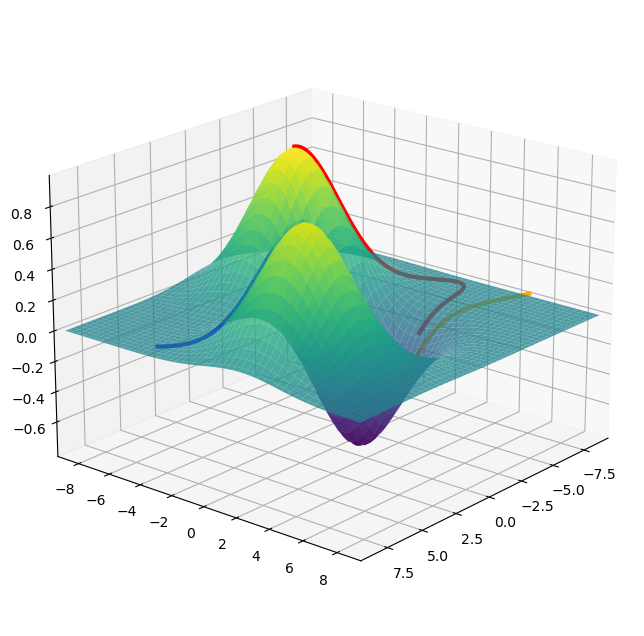

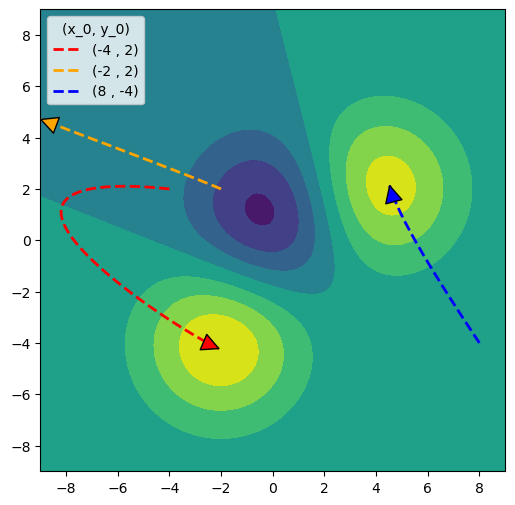

In [42]:
# Some Simulations

epsilon = 0.01 

initial_x_1 = -4
initial_y_1 = 2
x_list_1, y_list_1 = iterate_over_initial_conditions(initial_x_1, initial_y_1)
x_list_1 = np.array(x_list_1)
y_list_1 = np.array(y_list_1)
z_list_1 = z_function(x_list_1, y_list_1) + epsilon

initial_x_2 = -2
initial_y_2 = 2
x_list_2, y_list_2 = iterate_over_initial_conditions(initial_x_2, initial_y_2)
x_list_2 = np.array(x_list_2)
y_list_2 = np.array(y_list_2)
z_list_2 = z_function(x_list_2, y_list_2) + epsilon

initial_x_3 = 8
initial_y_3 = -4
x_list_3, y_list_3 = iterate_over_initial_conditions(initial_x_3, initial_y_3)
x_list_3 = np.array(x_list_3)
y_list_3 = np.array(y_list_3)
z_list_3 = z_function(x_list_3, y_list_3) + epsilon

# Plotting
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.view_init(20, 40)
ax1.plot_surface(x,y, z, cmap='viridis', alpha = 0.8)
ax1.plot(x_list_1, y_list_1, z_list_1,  c='red',  linewidth = 3, label = f"({initial_x_1} , {initial_y_1})")
ax1.plot(x_list_2, y_list_2, z_list_2,  c='orange',  linewidth = 3, label = f"({initial_x_2} , {initial_y_2})")
ax1.plot(x_list_3, y_list_3, z_list_3,  c='blue',  linewidth = 3, label = f"({initial_x_3} , {initial_y_3})")
#ax1.legend(title = "(x_0, y_0)", loc = "upper left")
#ax1.set_xlabel("x")
#ax1.set_ylabel("y")
#ax1.set_zlabel("z")
ax1.margins(x=0, y=0)
plt.savefig("img/3d_sgd.png", dpi = 300, bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(6,6))
ax2 = fig.add_subplot(111)
ax2.contourf(x,y,z, cmap = 'viridis')
ax2.plot(x_list_1, y_list_1, color = "red", linewidth = 2, linestyle = "--", label = f"({initial_x_1} , {initial_y_1})")
ax2.plot(x_list_2, y_list_2, color = "orange", linewidth = 2, linestyle = "--", label = f"({initial_x_2} , {initial_y_2})")
ax2.plot(x_list_3, y_list_3, color = "blue", linewidth = 2, linestyle = "--", label = f"({initial_x_3} , {initial_y_3})")
ax2.annotate('', xy=[x_list_1[-1], y_list_1[-1]],  xytext=[x_list_1[2700], y_list_1[2700]] , arrowprops=dict(facecolor='red', shrink=0.01))
ax2.annotate('', xy=[x_list_2[8000], y_list_2[8000]],  xytext=[x_list_2[5000], y_list_2[5000]] , arrowprops=dict(facecolor='orange', shrink=0.01))
ax2.annotate('', xy=[x_list_3[-1], y_list_3[-1]],  xytext=[x_list_3[300], y_list_3[300]] , arrowprops=dict(facecolor='blue', shrink=0.01))
ax2.set_xlim(-9,9)
ax2.legend(title = "(x_0, y_0)", loc = "upper left")
#ax2.set_xlabel("x")
#ax2.set_ylabel("y")
plt.savefig("img/contourf_sgd.png", dpi = 300, bbox_inches='tight')
plt.show()